In [1]:
# # If running in google colab:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

In [2]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob, Word

In [3]:
# Read in data
data = pd.read_csv('../data/vectors_labels_df.csv')

# # Read in data from Google Colab. Update directory accordingly.
# data = pd.read_csv('/content/drive/MyDrive/Python/vectors_labels_df.csv')

In [4]:
data.head(2)

,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,text_length,word_length,km_label,dbscan_label,km_label_cvec,km_label_tvec
0,CongressmanRaja,IL,Representative,Raja Krishnamoorthi,D,4845,"['tonight', 'president', 'stage', 'elaborate',...",'tonight' 'president' 'stage' 'elaborate' 'pho...,"[-0.2115751579, 0.39771672760000004, 0.0444499...",1623390,178283,1,0,0,1
1,RepMcGovern,MA,Representative,James McGovern,D,3587,"['hell', 'Donald', 'Trump', 'think', 'teargass...",'hell' 'Donald' 'Trump' 'think' 'teargasse' 'p...,"[-0.20878361280000002, 0.39065130130000003, 0....",1313476,154634,1,0,0,1


In [5]:
# Using TextBlob to find sentiment score for each politician's doc
# https://stackabuse.com/sentiment-analysis-in-python-with-textblob/
# https://towardsdatascience.com/aspect-based-sentiment-analysis-using-spacy-textblob-4c8de3e0d2b9
# https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

data['sentiment'] = [TextBlob(i).sentiment.polarity for i in data['liststring']]

In [6]:
data.to_csv('../data/sentiment_df.csv', index = False) 

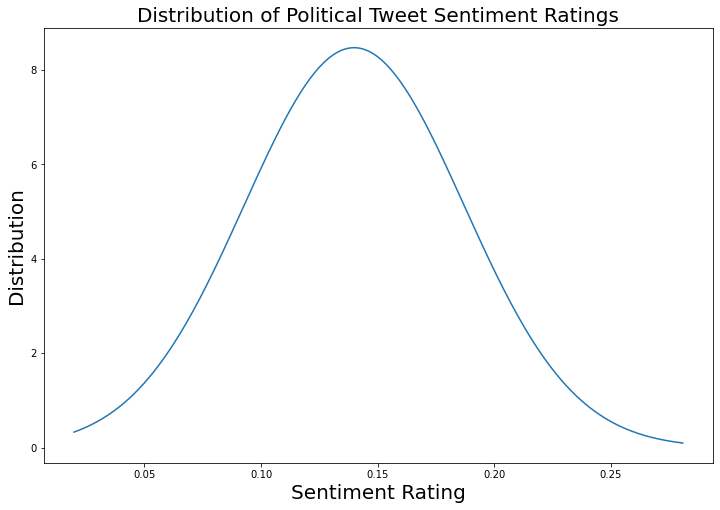

In [50]:
# Plotting a normal curve to see the distribution of tweet document sentiment
# https://www.statology.org/plot-normal-distribution-python/

x = np.arange(np.min(data['sentiment']), np.max(data['sentiment']), .001)

plt.figure(figsize=(12,8))
plt.plot(x, stats.norm.pdf(x, np.mean(data['sentiment']), np.std(data['sentiment'])))
                           
plt.title('Distribution of Political Tweet Sentiment Ratings', fontsize=20)
plt.xlabel('Sentiment Rating', fontsize=20)
plt.ylabel('Distribution', fontsize=20);

In [90]:
# Examining clusters and the strip plot of their sentiments (K Means)
# https://towardsdatascience.com/how-to-visualize-distributions-2cf2243c7b8e
# https://www.geeksforgeeks.org/stripplot-using-seaborn-in-python/

def plot_dists(column_label, model):
    plt.figure(figsize=(10,8))

    sns.stripplot(x = data[column_label], y = data['sentiment'], palette='crest')
    plt.title(f'Distribution of Sentiments for Each K Means Cluster:\n {model}', fontsize=20)
    plt.xlabel(f'K Means Group: {model}', fontsize=20)
    plt.ylabel('Sentiment Score', fontsize=20);

    plt.tight_layout();    

    plt.show()

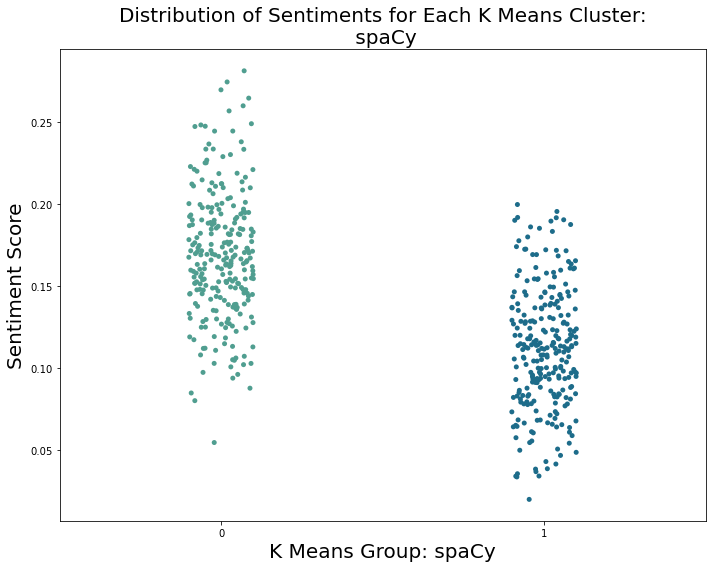

In [91]:
plot_dists('km_label', 'spaCy')

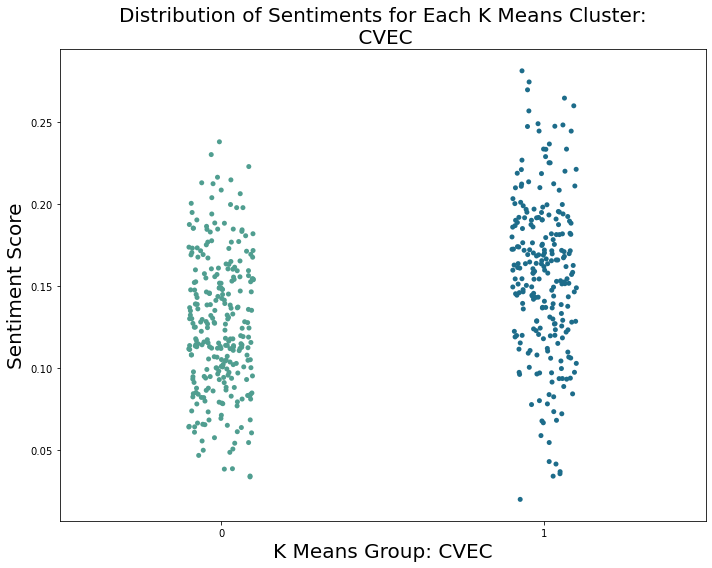

In [92]:
plot_dists('km_label_cvec', 'CVEC')

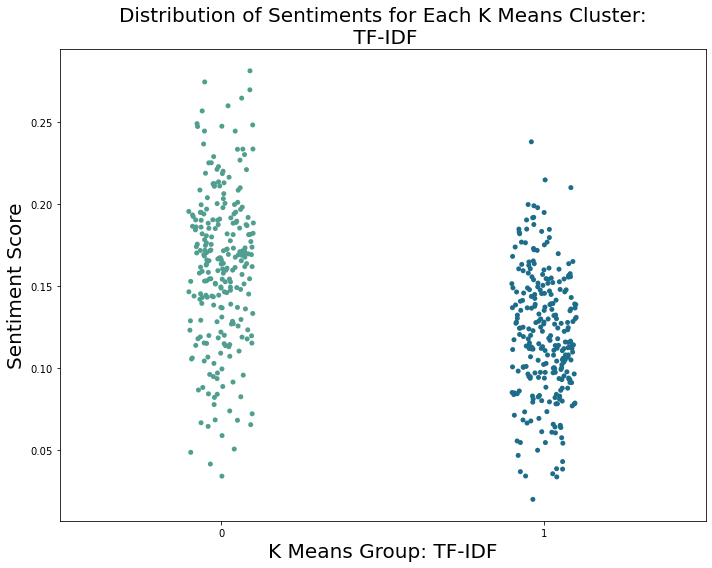

In [93]:
plot_dists('km_label_tvec', 'TF-IDF')

In [55]:
# sorted_df = df_marks.sort_values(by='algebra', ascending=False)

data.sort_values(by='sentiment', ascending=True).head(10)

,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,text_length,word_length,km_label,dbscan_label,km_label_cvec,km_label_tvec,sentiment
274,RepMaxineWaters,CA,Representative,Maxine Waters,D,567,"['black', 'man', 'woman', 'America', 'confront...",'black' 'man' 'woman' 'America' 'confront' 'po...,"[-0.22046431900000002, 0.3941837549, 0.0483047...",158392,22034,1,0,1,1,0.019796
159,JoaquinCastrotx,TX,Representative,Joaquin Castro,D,5753,"['deploy', 'military', 'american', 'people', '...",'deploy' 'military' 'american' 'people' 'Presi...,"[-0.2108858469, 0.392957433, 0.0491643168, -0....",2003478,231241,1,0,0,1,0.033486
217,RepMoBrooks,AL,Representative,Mo Brooks,R,1946,"['congratulation', 'Taxpayers', 'Friend', 'Awa...",'congratulation' 'Taxpayers' 'Friend' 'Award' ...,"[-0.2219659752, 0.38874778060000004, 0.0570039...",617836,69187,1,0,1,0,0.033943
19,BillPascrell,NJ,Representative,"Bill Pascrell, Jr",D,5697,"['overnight', 'trump', 'barricade', 'White', '...",'overnight' 'trump' 'barricade' 'White' 'House...,"[-0.22138126460000002, 0.3891915795, 0.0601581...",2362375,276424,1,0,0,1,0.034024
322,RepAdamSchiff,CA,Representative,Adam Schiff,D,1193,"['condemn', 'police', 'brutalityEnd', 'discrim...",'condemn' 'police' 'brutalityEnd' 'discriminat...,"[-0.2237411736, 0.39162674410000003, 0.0556361...",552633,68622,1,0,1,1,0.035419
49,RepKarenBass,CA,Representative,Karen Bass,D,1492,"['moral', 'moment', 'Congress', 'act', 'fill',...",'moral' 'moment' 'Congress' 'act' 'fill' 'cens...,"[-0.20964602170000002, 0.3992973797, 0.0496594...",455823,52081,1,0,1,1,0.036692
360,SenWarren,MA,Senator,Elizabeth Warren,D,3480,"['black', 'Americans', 'die', 'hand', 'police'...",'black' 'Americans' 'die' 'hand' 'police' 'Tru...,"[-0.22071991030000002, 0.3912848273, 0.0461094...",1263906,151774,1,0,0,1,0.038251
93,SenSanders,VT,Senator,Bernard Sanders,I,2450,"['Pope', 'Francis', 'absolutely', 'right', 'ba...",'Pope' 'Francis' 'absolutely' 'right' 'bad' 'p...,"[-0.2295932265, 0.39284258600000005, 0.0575924...",912677,112515,1,0,0,1,0.038482
506,RepRatcliffe,TX,Representative,John Ratcliffe,R,445,"['difficult', 'time', 'use', 'little', 'inspir...",'difficult' 'time' 'use' 'little' 'inspiration...,"[-0.2196003795, 0.3927460909, 0.0535621233, -0...",135438,15495,1,-1,1,0,0.041342
77,RepJeffries,NY,Representative,Hakeem Jeffries,D,1124,"['crime', 'opportunity', 'truly', 'inclusive',...",'crime' 'opportunity' 'truly' 'inclusive' 'soc...,"[-0.21828851100000002, 0.3861649334, 0.0574289...",297805,33580,1,0,1,1,0.042842


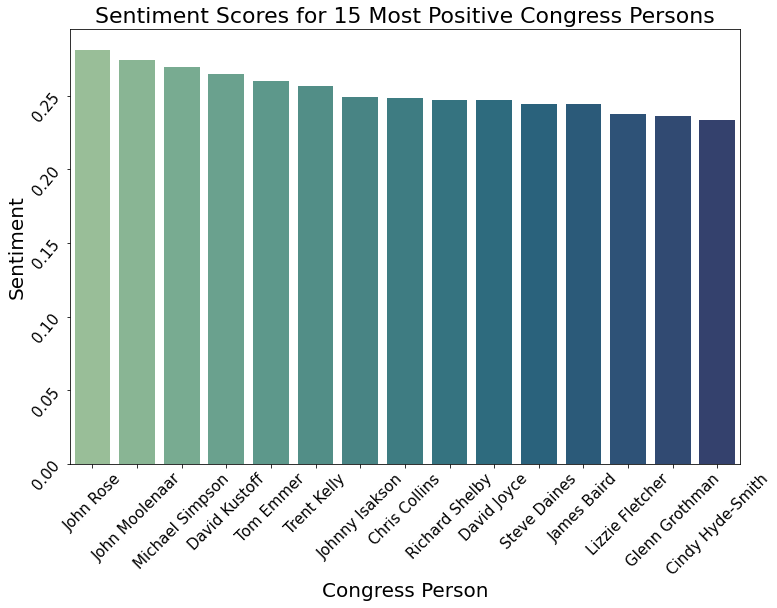

In [56]:
# create plot to examine sentiments of 15 most 'positive' twitter users

plot_data = data[['name', 'sentiment']]
plot_data = plot_data.sort_values(by='sentiment', ascending=False)[:15]

plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x = 'name', y = 'sentiment', data = plot_data,
            palette = 'crest'  
            )

plt.title('Sentiment Scores for 15 Most Positive Congress Persons', fontsize=22)

plt.xlabel('Congress Person', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

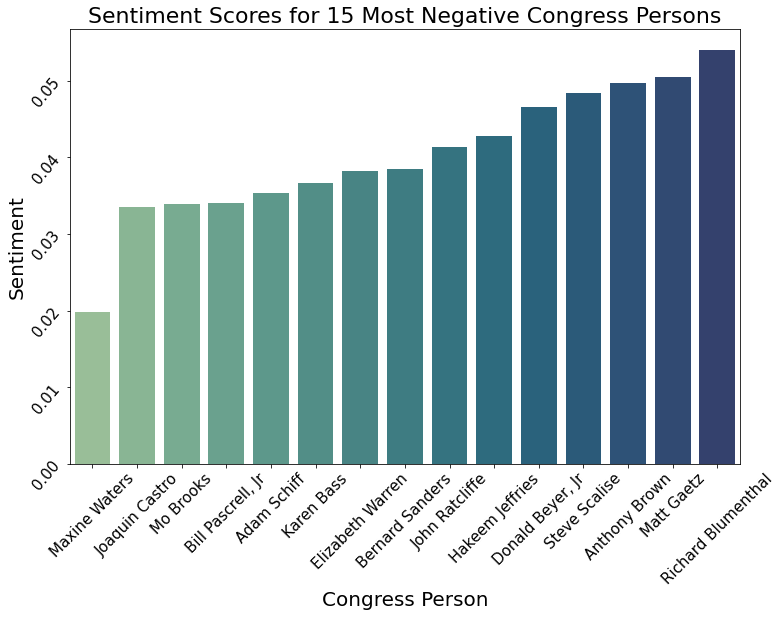

In [57]:
# create plot to examine sentiments of 15 most 'negative' twitter users

plot_data = data[['name', 'sentiment']]
plot_data = plot_data.sort_values(by='sentiment', ascending=True)[:15]

plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x = 'name', y = 'sentiment', data = plot_data,
            palette = 'crest'  
            )

plt.title('Sentiment Scores for 15 Most Negative Congress Persons', fontsize=22)

plt.xlabel('Congress Person', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [58]:
data.groupby(['party']).mean()['sentiment'].sort_values(ascending=False)

party
R    0.159176
D    0.123817
I    0.080715
L    0.060343
Name: sentiment, dtype: float64

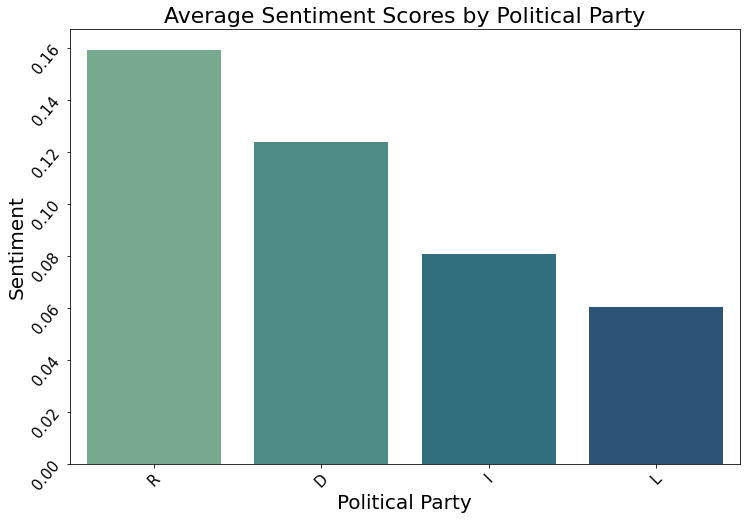

In [59]:
# create plot to examine sentiments of 15 most 'negative' twitter users

plot_data = data[['party', 'sentiment']]
# plot_data = data.groupby(['party']).mean()['sentiment'].sort_values(ascending=False)
plot_data = data.groupby(['party']).agg(sentiment =('sentiment','mean'))
plot_data = plot_data.reset_index()

plt.rcParams['figure.figsize'] = [12, 8]

# plot_data.plot(kind='bar', x='party', y='sentiment')

sns.barplot(x = 'party', 
            y = 'sentiment', 
            data = plot_data,
            palette = 'crest', 
            order=plot_data.sort_values('sentiment',ascending = False).party  
            )

plt.title('Average Sentiment Scores by Political Party', fontsize=22)

plt.xlabel('Political Party', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [60]:
data.groupby(['position']).mean()['sentiment'].sort_values(ascending=False)

position
Senator           0.141339
Representative    0.139545
Name: sentiment, dtype: float64

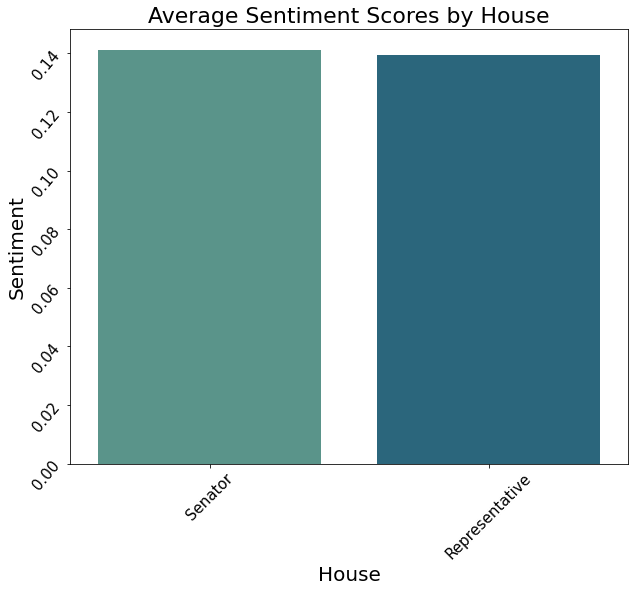

In [94]:
# create plot to examine sentiments by house membership

plot_data = data[['position', 'sentiment']]
# plot_data = data.groupby(['position']).mean()['sentiment'].sort_values(ascending=False)
plot_data = data.groupby(['position']).agg(sentiment =('sentiment','mean'))
plot_data = plot_data.reset_index()

plt.rcParams['figure.figsize'] = [10, 8]

# plot_data.plot(kind='bar', x='position', y='sentiment')

sns.barplot(x = 'position', 
            y = 'sentiment', 
            data = plot_data,
            palette = 'crest', 
            order=plot_data.sort_values('sentiment',ascending = False).position  
            )

plt.title('Average Sentiment Scores by House', fontsize=22)

plt.xlabel('House', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [80]:
data.head(1)

,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,text_length,word_length,km_label,dbscan_label,km_label_cvec,km_label_tvec,sentiment
0,CongressmanRaja,IL,Representative,Raja Krishnamoorthi,D,4845,"['tonight', 'president', 'stage', 'elaborate',...",'tonight' 'president' 'stage' 'elaborate' 'pho...,"[-0.2115751579, 0.39771672760000004, 0.0444499...",1623390,178283,1,0,0,1,0.079249


In [81]:
# data.groupby(bins).mean()['sentiment'].sort_values(ascending=False)

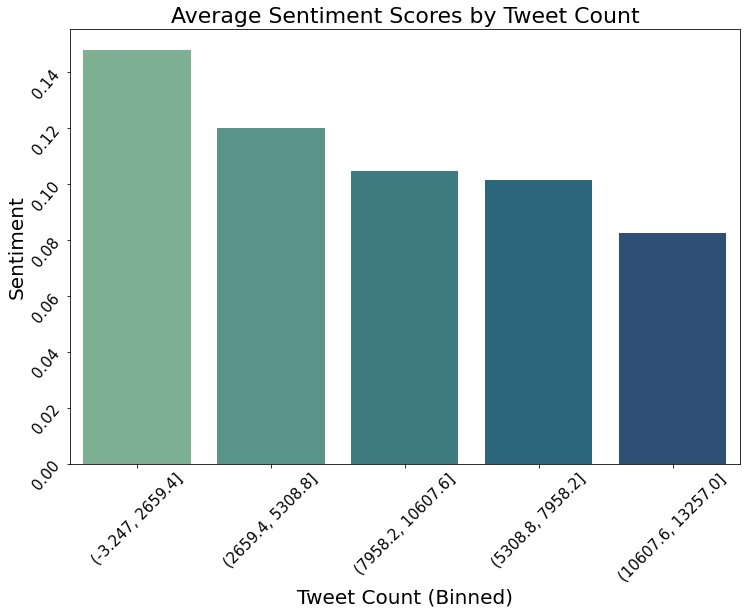

In [82]:
# create plot to examine sentiments by tweet count

plot_data = data[['tweet_count', 'sentiment']]

# plot_data = data.groupby(['position']).agg(sentiment =('sentiment','mean'))
# plot_data = plot_data.reset_index()

bins = pd.cut(data['tweet_count'], bins=5)

# plot_data = data.groupby(bins).mean()['sentiment'].sort_values(ascending=False)
plot_data = data.groupby(bins).agg(sentiment =('sentiment','mean'))
plot_data = plot_data.reset_index()

plt.rcParams['figure.figsize'] = [12, 8]

# plot_data.plot(kind='bar', x='tweet_count', y='sentiment')

sns.barplot(x = 'tweet_count', 
            y = 'sentiment', 
            data = plot_data,
            palette = 'crest', 
            order=plot_data.sort_values('sentiment',ascending = False).tweet_count  
            )

plt.title('Average Sentiment Scores by Tweet Count', fontsize=22)

plt.xlabel('Tweet Count (Binned)', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [65]:
data.groupby(['km_label']).mean()['sentiment'].sort_values(ascending=False)

km_label
0    0.168490
1    0.111608
Name: sentiment, dtype: float64

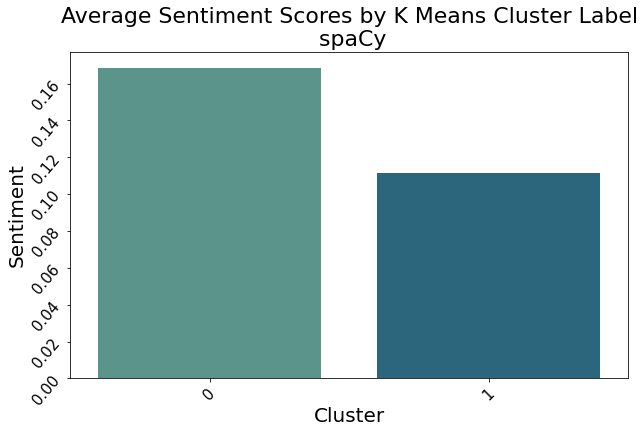

In [88]:
# create plot to examine sentiments by cluster

plot_data = data[['km_label', 'sentiment']]
# plot_data = data.groupby(['km_label']).mean()['sentiment'].sort_values(ascending=False)
plot_data = data.groupby(['km_label']).agg(sentiment =('sentiment','mean'))
plot_data = plot_data.reset_index()

plt.rcParams['figure.figsize'] = [10, 6]

# plot_data.plot(kind='bar', x='km_label', y='sentiment')

sns.barplot(x = 'km_label', 
            y = 'sentiment', 
            data = plot_data,
            palette = 'crest', 
            order=plot_data.sort_values('sentiment',ascending = False).km_label  
            )

plt.title('Average Sentiment Scores by K Means Cluster Label\n spaCy', fontsize=22)

plt.xlabel('Cluster', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [84]:
data.groupby(['km_label_cvec']).mean()['sentiment'].sort_values(ascending=False)

km_label_cvec
1    0.156108
0    0.125706
Name: sentiment, dtype: float64

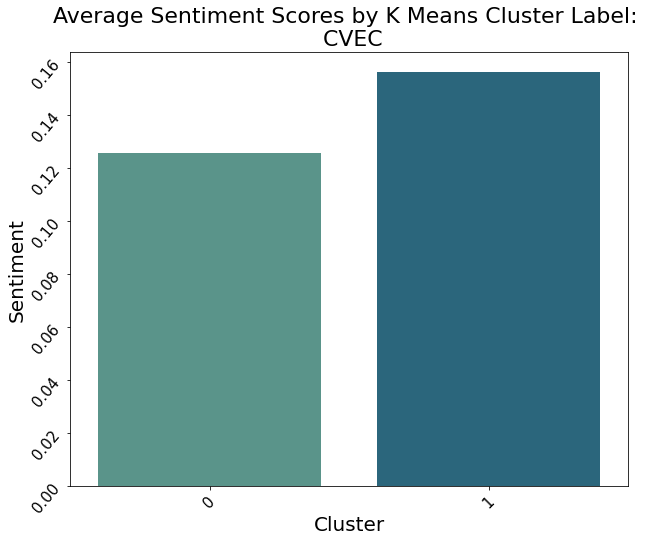

In [98]:
# create plot to examine sentiments by cvec cluster

plot_data = data[['km_label_cvec', 'sentiment']]
# plot_data = data.groupby(['km_label_cvec']).mean()['sentiment'].sort_values(ascending=False)

plot_data = data.groupby(['km_label_cvec']).agg(sentiment =('sentiment','mean'))
plot_data = plot_data.reset_index()

plt.rcParams['figure.figsize'] = [10, 8]

# plot_data.plot(kind='bar', x='km_label_cvec', y='sentiment')

sns.barplot(x = 'km_label_cvec', 
            y = 'sentiment', 
            data = plot_data,
            palette = 'crest', 
#             order=["0", "1"],
            order=plot_data.sort_values('sentiment', ascending = True).km_label_cvec  
            )

plt.title('Average Sentiment Scores by K Means Cluster Label: \n CVEC', fontsize=22)

plt.xlabel('Cluster', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [69]:
data.groupby(['km_label']).mean()['sentiment'].sort_values(ascending=False)

km_label
0    0.168490
1    0.111608
Name: sentiment, dtype: float64

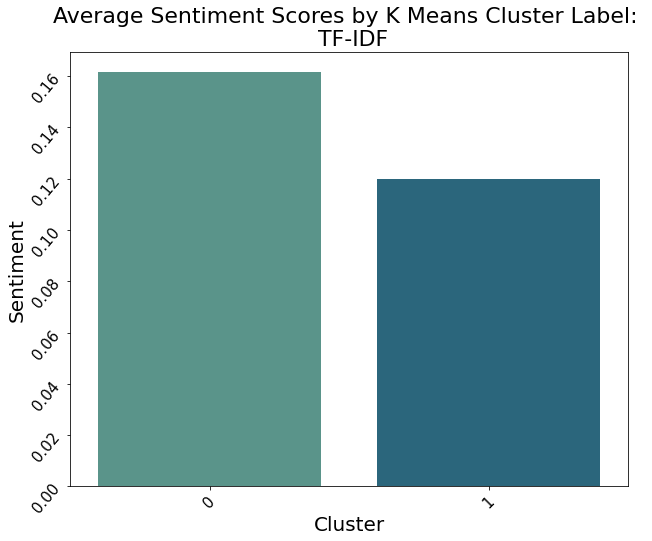

In [89]:
# create plot to examine sentiments by tvec cluster

plot_data = data[['km_label_tvec', 'sentiment']]
# plot_data = data.groupby(['km_label_tvec']).mean()['sentiment'].sort_values(ascending=False)
# plot_data['sentiment'] = data.groupby(['km_label_tvec']).mean()['sentiment']

plot_data = data.groupby(['km_label_tvec']).agg(sentiment =('sentiment','mean'))
plot_data = plot_data.reset_index()

plt.rcParams['figure.figsize'] = [10, 8]

# plot_data.plot(kind='bar', x='km_label_tvec', y='sentiment')

sns.barplot(x = 'km_label_tvec', 
            y = 'sentiment', 
            data = plot_data,
            palette = 'crest', 
            order=plot_data.sort_values('sentiment', ascending = False).km_label_tvec  
            )

plt.title('Average Sentiment Scores by K Means Cluster Label: \n TF-IDF', fontsize=22)

plt.xlabel('Cluster', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()